In [1]:
# importing libraries
import matplotlib
import pandas as pd
%matplotlib inline

In [2]:
# Loading data
df = pd.read_csv('twitter_archive_master.csv')

In [3]:
df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count,jpg_url
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,105,42,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,105,42,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,105,42,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,105,42,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,105,42,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg


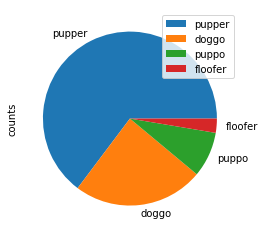

In [4]:
stage = df[df['stage'] != 'None']['stage'].value_counts().reset_index(name='counts')
stage.columns = ['unique_values', 'counts']
stage.plot(kind='pie',x='unique_values', y='counts', labels=stage['unique_values']);

#### The most common dog stage is pupper

#### Stage vs Rating

In [5]:
df['favorite_count'].value_counts()

105    1419
Name: favorite_count, dtype: int64

In [6]:
df['retweet_count'].value_counts()

42    1419
Name: retweet_count, dtype: int64

In [7]:
df_rating = df.copy()
df_rating['rating']=df_rating['rating_numerator']/df_rating['rating_denominator']
stage_rate = df_rating[df_rating['stage'] != 'None'].groupby('stage').mean()[['rating']].reset_index()
stage_rate

,stage,rating
0,doggo,1.206522
1,floofer,1.160000
2,pupper,1.040650
3,puppo,1.181250


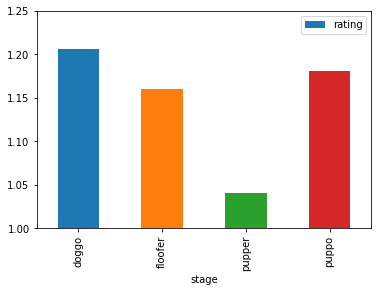

In [8]:
stage_rate.plot(kind='bar', x='stage', y='rating', ylim=(1.0,1.25));

#### The highest rated dogs belong to the doggo stage

#### Rating evolution over time

In [9]:
rate_vs_time = df_rating[['timestamp','rating_numerator','rating_denominator','rating']]
rate_vs_time['date'] = pd.to_datetime(rate_vs_time.timestamp)
rate_vs_time['date'] = rate_vs_time['date'].dt.date
rate_vs_time.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,timestamp,rating_numerator,rating_denominator,rating,date
0,2017-08-01 16:23:56,13,10,1.3,2017-08-01
1,2017-08-01 00:17:27,13,10,1.3,2017-08-01
2,2017-07-31 00:18:03,12,10,1.2,2017-07-31
3,2017-07-30 15:58:51,13,10,1.3,2017-07-30
4,2017-07-29 16:00:24,12,10,1.2,2017-07-29


In [10]:
rate_vs_time2 = rate_vs_time.groupby('date').mean()[['rating_numerator','rating_denominator','rating']].reset_index()
rate_vs_time2.head()

,date,rating_numerator,rating_denominator,rating
0,2015-11-16,9.000000,10.0,0.900000
1,2015-11-17,8.285714,10.0,0.828571
2,2015-11-18,8.666667,10.0,0.866667
3,2015-11-19,9.583333,10.0,0.958333
4,2015-11-20,9.500000,10.0,0.950000


(6, 14)

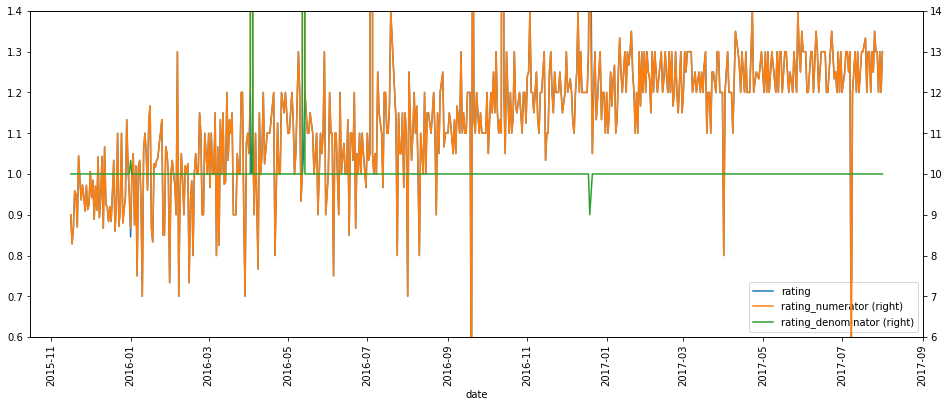

In [11]:
ax = rate_vs_time2.plot(x='date',y='rating',ylim=(0.6,1.4))
ax2 = rate_vs_time2.plot(x='date',y=['rating_numerator','rating_denominator'],secondary_y=True,ax=ax, rot=90, figsize=[16,6])
ax2.set_ylim(6, 14)

#### Most users have used 10 as rating denominator but, the rating numerator increased from an average of 9 up to 13 until January 2017 when this value estabilized between 12 and 13, the rating followed the same pattern as the rating numerator.

## Summary of findings
- The most common dog stage in this data set is pupper
- The highest rated dogs belong to the doggo stage
- Most users have used 10 as rating denominator but, the rating numerator increased from an average of 9 up to 13 until January 2017 when this value estabilized between 12 and 13, the rating followed the same pattern as the rating numerator.
